In [63]:
import pandas as pd
import nltk

In [64]:
df = pd.read_csv('boston.csv')

In [65]:
df

,text,id,from_user,iso_language_code
0,RT @ItsJennaMarbles: Reports of Marathon Runne...,323906397609791488,sangyashrestha,en
1,RT @NBCSN: Reports of Marathon Runners that cr...,323906397618196483,ChelseaGilson,en
2,RT @NBCSN: Reports of Marathon Runners that cr...,323906397735641088,Blakstoise,en
3,RT @PeterBurnsRadio: RT @NBCSN: Reports of Mar...,323906397853073410,markson,en
4,RT @NBCSN: Reports of Marathon Runners that cr...,323906397962121216,MarlyCakes85,en
5,RT @NBCSN: Reports of Marathon Runners that cr...,323906398012461057,_megannoelle_,en
6,RT @BusterBrown125: RT @NBCSN: Reports of Mara...,323906398230544385,StephStephGerl,en
7,RT @ItsJennaMarbles: Reports of Marathon Runne...,323906398314438656,Mollyx1D,en
8,@mrjakehumphrey @NBCSN: Reports of Marathon Ru...,323906398352195585,ScottMitchell89,en
9,RT @leeodden: @Google - Google Person Finder L...,323906398423490561,EShibutani,en


In [66]:
df.shape

(251, 4)

In [67]:
df['text'][0]

'RT @ItsJennaMarbles: Reports of Marathon Runners that crossed finish line and continued to run to Mass General Hospital to give blood to victims. #PrayforBoston'

In [68]:
from nltk.corpus import stopwords

In [69]:
stopwords = set(stopwords.words('english'))

In [70]:
len(stopwords) 

153

In [71]:
df.loc[0]

text                 RT @ItsJennaMarbles: Reports of Marathon Runne...
id                                                  323906397609791488
from_user                                               sangyashrestha
iso_language_code                                                   en
Name: 0, dtype: object

In [72]:
import numpy as np
df['links'] = np.nan   #Adding new column for urls present in the tweets.

In [73]:
import re
tweets = []
for i in xrange(251):
    tweets.append(df.loc[i]['text'])

len(tweets)


251

In [74]:
for i,each in enumerate(tweets):     
    write_tweet = []
    #urls present in the tweet.
    urls = []
    #url for the tweet saved in the corresponding column.
    urls = re.findall('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', each)
    at_the_rate = re.findall('@\w+[:," ",")"]',each)
    for word in each.split():
        if word not in urls and word not in at_the_rate:
            write_tweet.append(word)
    write_tweet = ' '.join(write_tweet)
    tweets[i] = write_tweet
    
print("Printing first 50/(maximum 140 characters) of first all tweets from dataset:")
for each in tweets:
    print each[:50]

Printing first 50/(maximum 140 characters) of first all tweets from dataset:
RT Reports of Marathon Runners that crossed finish
RT Reports of Marathon Runners that crossed finish
RT Reports of Marathon Runners that crossed finish
RT RT Reports of Marathon Runners that crossed fin
RT Reports of Marathon Runners that crossed finish
RT Reports of Marathon Runners that crossed finish
RT RT Reports of Marathon Runners that crossed fin
RT Reports of Marathon Runners that crossed finish
@mrjakehumphrey Reports of Marathon Runners that c
RT @Google - Google Person Finder Locates Missing 
RT #Boston police confirm another explosion at cit
RT Reports of Marathon Runners that crossed finish
RT There are reports of Boston Marathon runners cr
RT Reports of Marathon Runners that crossed finish
RT Reports of Marathon Runners that crossed finish
RT Wow. RT Reports of Marathon Runners that crosse
RT Google Person Finder Locates Missing at Boston 
Resource Google Person Finder Locates Missing at B
RT RT

In [75]:
#Stopwords removal-Round-1
for i,tweet in enumerate(tweets):
    write_tweet = []
    words = re.findall(r'\w+',tweet)
    #print words,
    for each in words:
        each = each.lower()
        if each not in stopwords:
            write_tweet.append(each)
    write_tweet = ' '.join(write_tweet)
    tweets[i] = write_tweet

print("Printing first 50/(maximum 140 characters) of all tweets from dataset:")
for each in tweets:
    print each[:50]

Printing first 50/(maximum 140 characters) of all tweets from dataset:
rt reports marathon runners crossed finish line co
rt reports marathon runners crossed finish line co
rt reports marathon runners crossed finish line co
rt rt reports marathon runners crossed finish line
rt reports marathon runners crossed finish line co
rt reports marathon runners crossed finish line co
rt rt reports marathon runners crossed finish line
rt reports marathon runners crossed finish line co
mrjakehumphrey reports marathon runners crossed fi
rt google google person finder locates missing bos
rt boston police confirm another explosion city jf
rt reports marathon runners crossed finish line co
rt reports boston marathon runners crossing finish
rt reports marathon runners crossed finish line co
rt reports marathon runners crossed finish line co
rt wow rt reports marathon runners crossed finish 
rt google person finder locates missing boston mar
resource google person finder locates missing bost
rt rt thank

In [76]:
#Adding new stopwords after analyzing the tweets above.
for each in ['rt','lolz',"i've",'the','to','a','of','in','on','is','and','i','-','it']:
    stopwords.add(each) 

In [77]:
##Stopwords removal-Round-2
for i,tweet in enumerate(tweets):
    write_tweet = []
    words = re.findall(r'\w+',tweet)
    for each in words:
        each = each.lower()
        if each not in stopwords:
            write_tweet.append(each)
    write_tweet = ' '.join(write_tweet)
    tweets[i] = write_tweet

print(len(tweets))
print("Printing first 50/(maximum 140 characters) of all tweets from dataset:")
for each in tweets[:30]:
    print each[:50]

251
Printing first 50/(maximum 140 characters) of all tweets from dataset:
reports marathon runners crossed finish line conti
reports marathon runners crossed finish line conti
reports marathon runners crossed finish line conti
reports marathon runners crossed finish line conti
reports marathon runners crossed finish line conti
reports marathon runners crossed finish line conti
reports marathon runners crossed finish line conti
reports marathon runners crossed finish line conti
mrjakehumphrey reports marathon runners crossed fi
google google person finder locates missing boston
boston police confirm another explosion city jfk l
reports marathon runners crossed finish line conti
reports boston marathon runners crossing finish li
reports marathon runners crossed finish line conti
reports marathon runners crossed finish line conti
wow reports marathon runners crossed finish line c
google person finder locates missing boston marath
resource google person finder locates missing bost
thanks 

In [78]:
len(tweets)

251

In [79]:
#Removing duplicate tweets i.e. Retweets removed.
tweets = list(set(tweets))

In [80]:
'''So, only 94 unique number of tweets are remaining.'''
len(tweets)

94

In [81]:
'''Note the removal of stopwords in the output.'''
print("Printing first 50/(maximum 140 characters) of all tweets from dataset:")
for each in tweets:
    print each[:50]

Printing first 50/(maximum 140 characters) of all tweets from dataset:
bombing suspect unable speak sedated intubated hos
boston bombing suspect caught surveillance video c
boston marathon bomber manhunt one suspect dead se
reports marathon runners crossed finish line conti
marathon bomb suspect eludes police hunt shuts bos
cellphone service shut boston prevent remote deton
breaking news boston marathon terror bombing suspe
marathon bomb suspect eludes police hunt shuts bos
fbi releases new details boston marathon bombs new
mikandynothem trying defeat human spirit marathone
boston marathon bomber manhunt one suspect dead se
nbcnews feel blessed boston marathon runner escape
good info new aerial images show boston bombing su
bombing suspect unable speak sedated intubated hos
google person finder locates missing boston marath
boston bombing suspect caught surveillance video c
new aerial images show boston bombing suspect boat
entrepreneurship new aerial images show boston bom
boston bomb

In [82]:
'''Saving cleaned tweets in a file on the disk.'''

'Saving cleaned tweets in a file on the disk.'

In [83]:
df2 = pd.DataFrame(data=tweets,columns=['text'])

In [84]:
df2.to_csv('cleaned_tweets.csv',index_label=False)#index_label=False to avoid Unnamed columns.

In [85]:
data = pd.read_csv('cleaned_tweets.csv') 

In [86]:
data.head()

,text
0,bombing suspect unable speak sedated intubated...
1,boston bombing suspect caught surveillance vid...
2,boston marathon bomber manhunt one suspect dea...
3,reports marathon runners crossed finish line c...
4,marathon bomb suspect eludes police hunt shuts...


In [87]:
# load nltk's SnowballStemmer as variabled 'stemmer'
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [88]:
#lets stem our list tweets also, so that results are permanent.
'''Note the stemmed words in the output.'''
for i,tweet in enumerate(tweets):
    write_tweet = []
    for each in tweet.split():
        words = re.findall(r'\w+',each)
        for word in words:
            write_tweet.append(stemmer.stem(word))
    tweets[i] = ' '.join(write_tweet)
    
print("Printing first 50/(maximum 140 characters) of all tweets from dataset:")
for each in tweets:
    print each[:50]

Printing first 50/(maximum 140 characters) of all tweets from dataset:
bomb suspect unabl speak sedat intub hospit fed co
boston bomb suspect caught surveil video could maj
boston marathon bomber manhunt one suspect dead se
report marathon runner cross finish line continu r
marathon bomb suspect elud polic hunt shut boston 
cellphon servic shut boston prevent remot deton ex
break news boston marathon terror bomb suspect arr
marathon bomb suspect elud polic hunt shut boston
fbi releas new detail boston marathon bomb news
mikandynothem tri defeat human spirit marathon wro
boston marathon bomber manhunt one suspect dead se
nbcnew feel bless boston marathon runner escap bom
good info new aerial imag show boston bomb suspect
bomb suspect unabl speak sedat intub hospit fed co
googl person finder locat miss boston marathon exp
boston bomb suspect caught surveil video could maj
new aerial imag show boston bomb suspect boat us b
entrepreneurship new aerial imag show boston bomb 
boston bomb use

In [89]:
def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

In [90]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TfidfVectorizer() converts a collection of raw documents to a matrix of TF-IDF features.
#The returned object is saved in tfidf_vectorizer.
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 min_df=0.2, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem, 
                                 ngram_range=(1,3))

#fit_transform() learns the vocabulary and idf, returns tfidf document matrix.
%time tfidf_matrix = tfidf_vectorizer.fit_transform(tweets)

#Shape of returned Tf-idf-weighted document-term matrix.
#Shape: sparse matrix, [n_samples, n_features]
print(tfidf_matrix.shape) 

CPU times: user 60 ms, sys: 4 ms, total: 64 ms
Wall time: 53.7 ms
(94, 10)


In [91]:
#Tf-idf-weighted document-term matrix.
# sparse matrix, [n_samples, n_features]
tfidf_matrix

<94x10 sparse matrix of type '<type 'numpy.float64'>'
	with 383 stored elements in Compressed Sparse Row format>

In [92]:
#The learned idf vector (global term weights).
tfidf_vectorizer.idf_

array([ 1.58358498,  2.22167238,  1.26341745,  1.86499744,  2.29578035,
        1.37948962,  2.29578035,  2.55814462,  2.46283444,  1.86499744])

In [93]:
'''A index vocabulary (dictionary) of the words of the tweets.
Using these features, we can convert tweets into a vector space,
where each dictionary value of the feature is the correspondig index, 
so the first term of the vector represents the “bomb” term of our vocabulary, 
the second represents “bomb suspect” and so on. 
But, we’re going to use the Tf-idf-weighted values to represent each term in our vector space.'''
tfidf_vectorizer.vocabulary_

{u'bomb': 0,
 u'bomb suspect': 1,
 u'boston': 2,
 u'boston marathon': 3,
 u'explo': 4,
 u'marathon': 5,
 u'marathon bomb': 6,
 u'new': 7,
 u'polic': 8,
 u'suspect': 9}

In [94]:
#Array mapping from feature integer indices to feature name.
#These are the features, the columns in the tfidf matrix correspond to.
terms = tfidf_vectorizer.get_feature_names()
terms

[u'bomb',
 u'bomb suspect',
 u'boston',
 u'boston marathon',
 u'explo',
 u'marathon',
 u'marathon bomb',
 u'new',
 u'polic',
 u'suspect']

In [95]:
'''Cosine similarity gives a useful measure of how similar two tweets 
are likely to be in terms of their subject matter.'''
from sklearn.metrics.pairwise import cosine_similarity

#Compute cosine similarity between samples in X and Y.
#cosine_similarity() returns an array with shape (n_samples_X, n_samples_Y).
#Here we will get distance of 94 tweets to all 94 tweets.
dist = 1 - cosine_similarity(tfidf_matrix)
dist.shape

(94, 94)

In [96]:
#So, ideally the distance of a tweet-vector to itself should be zero.
print dist[0][0]
print dist[2][2]
print dist[3][3]

0.0
0.0
0.0


In [97]:
#We run Kmeans 300 times for 25 clusters.
from sklearn.cluster import KMeans

num_clusters = 25

km = KMeans(n_clusters=num_clusters)

#km.fit() runs the KMeans clustering algorithm by default, 300 times.
%time km.fit(tfidf_matrix)

#Cluster Labels of each point i.e. each corresponding tweet. 
clusters = km.labels_.tolist()

CPU times: user 268 ms, sys: 0 ns, total: 268 ms
Wall time: 267 ms


In [98]:
print len(clusters)
"Printing clusters of first 10 tweets:",clusters[:10]


94


('Printing clusters of first 10 tweets:', [20, 16, 5, 2, 1, 10, 16, 1, 9, 2])

In [99]:
# Return matrix of dimensions [n_clusters, n_features]
print km.cluster_centers_.shape
km.cluster_centers_

(25, 10)


array([[ 0.        ,  0.        ,  0.40700025,  0.51042649,  0.62832639,
         0.37754907,  0.        ,  0.        ,  0.        ,  0.04702898],
       [ 0.32659599,  0.4581941 ,  0.23697194,  0.        ,  0.        ,
         0.25874292,  0.4306063 ,  0.        ,  0.46193967,  0.38463404],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.44758317,  0.62793168,  0.35709128,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.52712136],
       [ 0.60631353,  0.        ,  0.28297753,  0.41771813,  0.        ,
         0.30897513,  0.51420397,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.31083226,  0.45883596,  0.        ,
         0.33938891,  0.        ,  0.        ,  0.6059188 ,  0.45883596],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        

In [100]:
#Saving the clustering result to disk.

res = { 'rank':range(94),'tweets': tweets, 'cluster': clusters }

frame = pd.DataFrame(res, index = range(94) , columns = [ 'rank','tweets', 'cluster'])

frame.to_csv('clustered_tweets.csv', index_label=False)

In [101]:
frame

,rank,tweets,cluster
0,0,bomb suspect unabl speak sedat intub hospit fe...,20
1,1,boston bomb suspect caught surveil video could...,16
2,2,boston marathon bomber manhunt one suspect dea...,5
3,3,report marathon runner cross finish line conti...,2
4,4,marathon bomb suspect elud polic hunt shut bos...,1
5,5,cellphon servic shut boston prevent remot deto...,10
6,6,break news boston marathon terror bomb suspect...,16
7,7,marathon bomb suspect elud polic hunt shut boston,1
8,8,fbi releas new detail boston marathon bomb news,9
9,9,mikandynothem tri defeat human spirit marathon...,2


In [102]:
#Finding out the most frequent words in the clusters. 

from collections import Counter,defaultdict
cluster_theme = []
for j in xrange(25):
    words = []
    for i in xrange(94):
        if frame.loc[i]['cluster'] == j:
            words += frame.loc[i]['tweets'].split()
            
    word_counts = Counter(words) #counts the number each time a word appears
    cluster_theme.append(word_counts.most_common(5))

In [103]:
#We will draw conclusions from this later on.
print 'Cluster_Nos   No. of tweets in the cluster'
frame['cluster'].value_counts()

Cluster_Nos   No. of tweets in the cluster


2     11
0     10
9      8
1      7
5      7
7      7
8      5
19     4
4      4
14     4
20     3
16     3
11     3
10     3
3      2
6      2
12     2
15     2
23     1
13     1
17     1
18     1
21     1
22     1
24     1
Name: cluster, dtype: int64

In [104]:
'''Multidimensional scaling (MDS) is a means of visualizing
the level of similarity of individual cases of a dataset.
An MDS algo will try to place each object in N-dimensional space (here N=2) 
such that the between-object distances are preserved as well as possible. 
Each object is then assigned coordinates in each of the N dimensions.'''
from sklearn.manifold import MDS

MDS()

mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
#Arguments:
# n_components=2: as we're plotting points in a two-dimensional plane.
# "precomputed": because we provide a distance matrix 
#in which we have already tweet-vectors' distance.
# random_state=1: we will also specify `random_state` so the 
#plot is reproducible, same seeds used for centers.

# Argument is [n_samples, n_samples] i.e. [94,94] if dissimilarity=’precomputed’.
#Result is [n_samples, n_componets] i.e. [94,2].
pos = mds.fit_transform(dist)

xs, ys = pos[:, 0], pos[:, 1]

In [105]:
#Result is [n_samples, n_componets] i.e. [94,2].
#Coordinates of each tweet-vector in 2 dimensions
#according to the cosine similarity of tweets.
pos.shape

(94, 2)

In [106]:
'''Graphical Representation.'''

'Graphical Representation.'

In [121]:
#set up colors per clusters using a dict
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#66a61e',
                  5:'#3333cc',6:'#8b8386',7:'#1e90ff',8:'#99004d',9:'#196666',10:'#3d5c5c',
                  11:'#206040',12:'#5c0099',13:'#993300',14:'#996633',15:'#ffff00',
                  16:'#000000',17:'#00ffff',18:'#ff0000',19:'#009900',20:'#ffd39b',
                  21:'#caff70',22:'#635688',23:'#7171c6',24:'#ffc1c1'}

#set up cluster names using a dict
cluster_names = defaultdict()
for i in xrange(25):
    cluster_names[i] = cluster_theme[i]

In [116]:
cluster_theme

[[(u'boston', 12),
  (u'googl', 11),
  (u'marathon', 10),
  (u'explos', 10),
  (u'person', 9)],
 [(u'bomb', 8), (u'suspect', 8), (u'elud', 8), (u'shut', 7), (u'polic', 7)],
 [(u'marathon', 11),
  (u'victim', 6),
  (u'give', 6),
  (u'runner', 6),
  (u'continu', 6)],
 [(u'major', 2),
  (u'bomb', 2),
  (u'boston', 2),
  (u'caught', 2),
  (u'surveil', 2)],
 [(u'bomb', 7),
  (u'boston', 4),
  (u'marathon', 4),
  (u'pressur', 3),
  (u'use', 3)],
 [(u'run', 7), (u'polic', 7), (u'boston', 7), (u'say', 7), (u'dead', 7)],
 [(u'blood', 2),
  (u'bostonmarathon', 2),
  (u'current', 1),
  (u'everi', 1),
  (u'thank', 1)],
 [(u'boston', 8), (u'aerial', 7), (u'show', 7), (u'boat', 7), (u'suspect', 7)],
 [(u'bomb', 5), (u'140', 5), (u'boston', 5), (u'dead', 5), (u'injur', 5)],
 [(u'bomb', 13),
  (u'boston', 10),
  (u'marathon', 10),
  (u'fbi', 8),
  (u'detail', 8)],
 [(u'boston', 4),
  (u'explos', 3),
  (u'prevent', 2),
  (u'offici', 2),
  (u'shut', 2)],
 [(u'bomb', 5), (u'boston', 2), (u'pressur', 2), 

In [117]:
%matplotlib inline
import matplotlib.pyplot as plt

In [118]:
#create data frame that has the result of the MDS plus the cluster numbers and the rank of tweets.
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, rank=frame['rank'])) 

#group by cluster
groups = df.groupby('label')

print "Cluster wise tweet-vectors of tweets in 2 dimensions:"
for index,each in enumerate(list(groups)):
    print "--------------------------------------------"
    print "Cluster",index
    print "---------------------------------------------"
    print each

Cluster wise tweet-vectors of tweets in 2 dimensions:
--------------------------------------------
Cluster 0
---------------------------------------------
(0,     label  rank         x         y
14      0    14 -0.253582  0.349512
24      0    24 -0.253582  0.349512
58      0    58 -0.253582  0.349512
60      0    60 -0.209273  0.340959
67      0    67 -0.253582  0.349512
69      0    69 -0.202562  0.170313
70      0    70 -0.253582  0.349512
83      0    83 -0.253582  0.349512
84      0    84 -0.253582  0.349512
87      0    87 -0.209273  0.340959)
--------------------------------------------
Cluster 1
---------------------------------------------
(1,     label  rank         x         y
4       1     4  0.126232 -0.270299
7       1     7  0.126232 -0.270299
29      1    29  0.126232 -0.270299
43      1    43  0.126232 -0.270299
61      1    61  0.126232 -0.270299
74      1    74  0.126232 -0.270299
93      1    93  0.225753 -0.298329)
--------------------------------------------
Clust

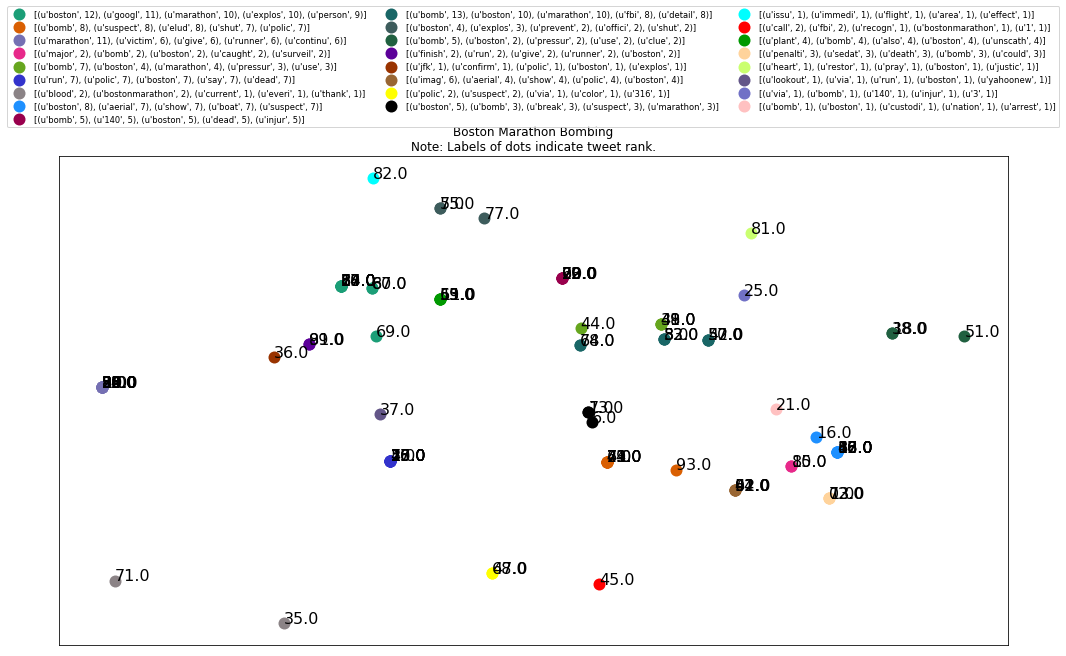

In [136]:
from matplotlib.font_manager import FontProperties
# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts 
#with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, label=cluster_names[name], color=cluster_colors[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')

fontP = FontProperties()
fontP.set_size('small')
ax.legend(numpoints=1,prop=fontP,loc='lower center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=False)  #show legend with only 1 point

#add label in x,y position with the label as the tweet rank 
for i in range(len(df)):
    ax.text(df.ix[i]['x'], df.ix[i]['y'], df.ix[i]['rank'], size=16)  
    
plt.title('Boston Marathon Bombing\nNote: Labels of dots indicate tweet rank.')
    
plt.show() #show the plot

#plt.savefig('clusters_small_noaxes.png', dpi=200) #to save on disk.

In [139]:
#Further Conclusions:
print "The Cluster Numbers and the Cluster Theme:"
for i in xrange(25):
    print 'Cluster',i,cluster_theme[i]
    
print "---------------------------------------------------------"
print 'Cluster_Nos   No. of tweets in the cluster'
print frame['cluster'].value_counts()

The Cluster Numbers and the Cluster Theme:
Cluster 0 [(u'boston', 12), (u'googl', 11), (u'marathon', 10), (u'explos', 10), (u'person', 9)]
Cluster 1 [(u'bomb', 8), (u'suspect', 8), (u'elud', 8), (u'shut', 7), (u'polic', 7)]
Cluster 2 [(u'marathon', 11), (u'victim', 6), (u'give', 6), (u'runner', 6), (u'continu', 6)]
Cluster 3 [(u'major', 2), (u'bomb', 2), (u'boston', 2), (u'caught', 2), (u'surveil', 2)]
Cluster 4 [(u'bomb', 7), (u'boston', 4), (u'marathon', 4), (u'pressur', 3), (u'use', 3)]
Cluster 5 [(u'run', 7), (u'polic', 7), (u'boston', 7), (u'say', 7), (u'dead', 7)]
Cluster 6 [(u'blood', 2), (u'bostonmarathon', 2), (u'current', 1), (u'everi', 1), (u'thank', 1)]
Cluster 7 [(u'boston', 8), (u'aerial', 7), (u'show', 7), (u'boat', 7), (u'suspect', 7)]
Cluster 8 [(u'bomb', 5), (u'140', 5), (u'boston', 5), (u'dead', 5), (u'injur', 5)]
Cluster 9 [(u'bomb', 13), (u'boston', 10), (u'marathon', 10), (u'fbi', 8), (u'detail', 8)]
Cluster 10 [(u'boston', 4), (u'explos', 3), (u'prevent', 2), (u'